In [3]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib.patches as patches
from PIL import Image
from ast import literal_eval
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek 
from sklearn.ensemble import RandomForestClassifier
import sys
sys.path.append('..')
sys.path.append('../..')
sys.path.append('../../..')
from soreva_metrics import calculate_metrics
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
def mean(lst):
    return sum(lst) / len(lst)



train_df = pd.read_csv('./full_train_df.csv').drop(['Unnamed: 0','index','id'],axis=1)



train_df['tc_prediction_mult'] = train_df['tissue_density_predicted'] * train_df['cancer_probability_predicted']




In [4]:
train_df = train_df.drop(['laterality','patient_id'],axis=1)

In [13]:
model = LGBMClassifier(boosting_type='dart', class_weight='balanced')

X = train_df.drop(['BiRads','CC','MLO'],axis=1)
y = train_df['BiRads']

# param_grid = {
#     'boosting_type': ['dart','gbdt','goss'], #,
#     'n_estimators': [100, 200,300],
#     'colsample_bytree': [0.7, 0.8],
#     'max_depth': [15,20,25],
#     'num_leaves': [50, 100, 200],
#     'reg_alpha': [1.1,1.2,1.3],
#     'reg_lambda': [1.1, 1.2, 1.3],
#     'min_split_gain': [0.3, 0.4],
#     'subsample': [0.7, 0.8, 0.9],
#     'subsample_freq': [20],
#     'class_weight' : ['balanced'] }
# gs = GridSearchCV(
#         model,
#         param_grid, 
#         cv=5, 
#         n_jobs=-1, 
#         scoring={'score' : make_scorer(calculate_metrics)},
#                                        refit="score",
#         verbose=5
#     )

model.fit(X,y)


LGBMClassifier(boosting_type='dart', class_weight='balanced')

In [221]:
# 0.084

# gs.best_score_

-0.09222955686218677

In [222]:
# gs.best_params_

{'boosting_type': 'dart',
 'class_weight': 'balanced',
 'n_estimators': 100,
 'reg_alpha': 1.3}

In [8]:
test_df = pd.read_json('./data_test.json').T
test_df['tc_prediction_mult'] = test_df['tissue_density_predicted'] * test_df['cancer_probability_predicted']


In [9]:
test_df = test_df.drop(['laterality','patient_id','CC','MLO'],axis=1)




In [15]:
test_df['tissue_density_predicted'] = pd.to_numeric(test_df['tissue_density_predicted'])
test_df['cancer_probability_predicted'] = pd.to_numeric(test_df['cancer_probability_predicted'])
test_df['tc_prediction_mult'] = pd.to_numeric(test_df['tc_prediction_mult'])


In [16]:
prediction =  model.predict(test_df)
submission = pd.DataFrame({'id' : test_df.index ,'BiRads':prediction})

submission.to_csv('../../submissions/lightgbm_with_second_breast.csv', index=False)

array([[<AxesSubplot:title={'center':'BiRads'}>]], dtype=object)

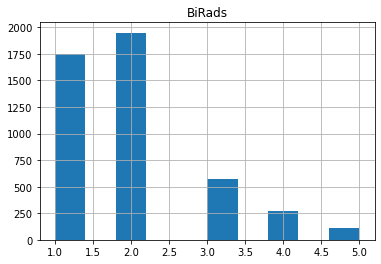

In [17]:
submission.hist()